### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

### Import Data

In [3]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


[Text(0.5, 0, 'Alcohol'),
 Text(1.5, 0, 'Malic_Acid'),
 Text(2.5, 0, 'Ash'),
 Text(3.5, 0, 'Ash_Alcanity'),
 Text(4.5, 0, 'Magnesium'),
 Text(5.5, 0, 'Total_Phenols'),
 Text(6.5, 0, 'Flavanoids'),
 Text(7.5, 0, 'Nonflavanoid_Phenols'),
 Text(8.5, 0, 'Proanthocyanins'),
 Text(9.5, 0, 'Color_Intensity'),
 Text(10.5, 0, 'Hue'),
 Text(11.5, 0, 'OD280'),
 Text(12.5, 0, 'Proline')]

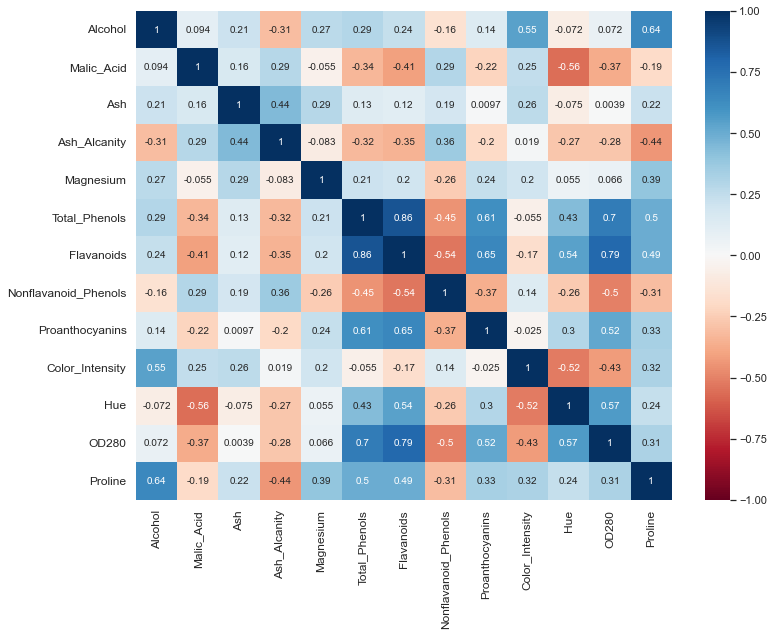

In [11]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df.corr(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize = 12)

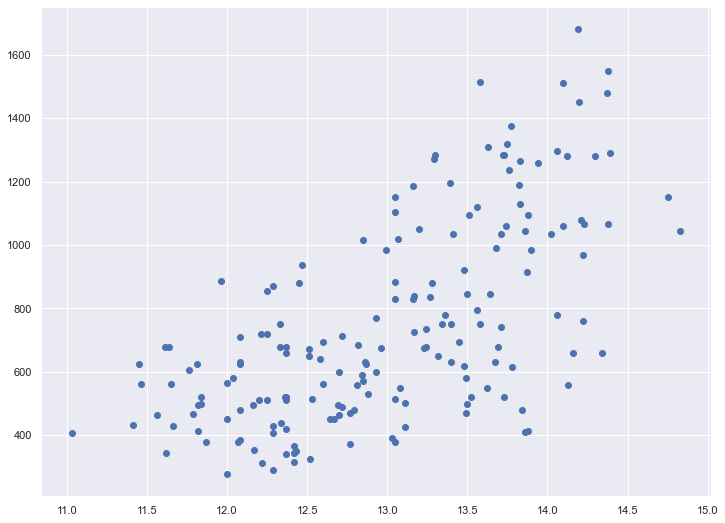

In [12]:
plt.figure(figsize=(12, 9))
plt.scatter(df['Alcohol'], df['Proline'])

In [14]:
scaler = StandardScaler()

df_std = scaler.fit_transform(df)

In [15]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.

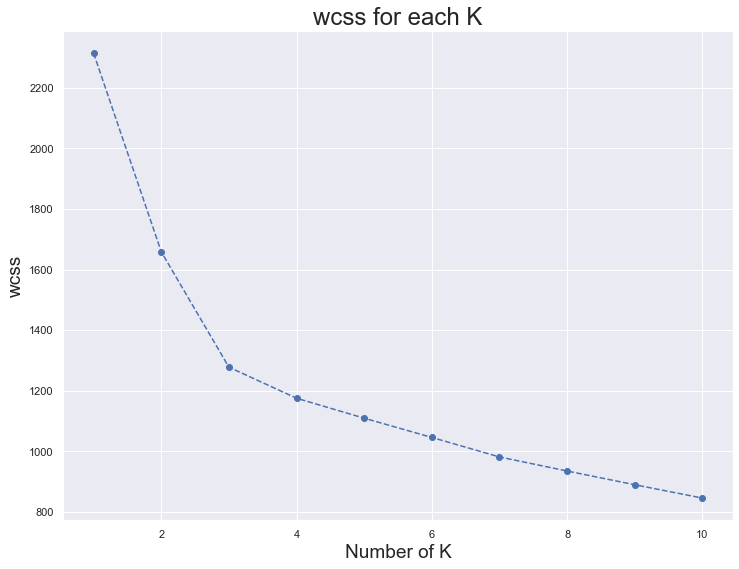

In [16]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('wcss for each K', fontsize = 24)
plt.xlabel('Number of K', fontsize=19)
plt.ylabel('wcss', fontsize=19, rotation=90)
plt.show()


#### 3 cluster Looks fine

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [22]:
kmeans.fit(df_std)

/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [23]:
df_clus = df.copy()
df_clus['Group'] = kmeans.labels_

In [24]:
df_clus.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [32]:
analyse = df_clus.groupby(['Group' ]).mean()
analyse

/var/folders/hg/h4r5pwgd6q11lyngyfsf63fr0000gn/T/ipykernel_12676/2177516427.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  analyse = df_clus.groupby(['Group' ]).mean()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Group,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


In [29]:
df_clus['Labels'] = df_clus['Group'].map({0: "GROUP A",
                                         1: "GROUP B",
                                         2: "GROUP C"})

In [30]:
df_clus.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group,Labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,GROUP C
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,GROUP C
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,GROUP C
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,GROUP C
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,GROUP C


/var/folders/hg/h4r5pwgd6q11lyngyfsf63fr0000gn/T/ipykernel_12676/1242924084.py:6: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue=hue, palette=['g', 'r', 'c', 'm'])


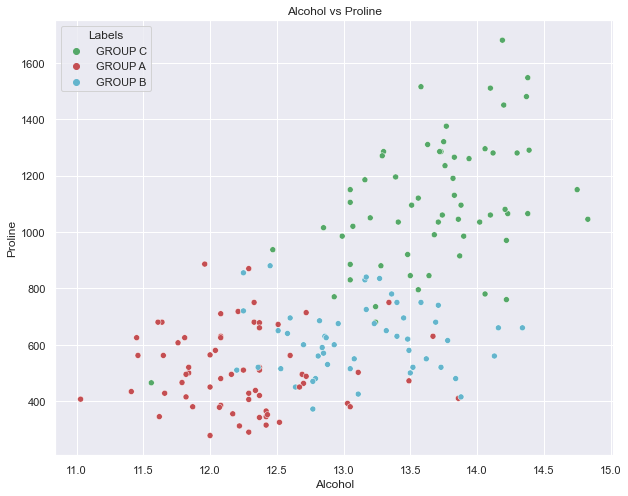

In [34]:
x_axis = df_clus['Alcohol']
y_axis = df_clus['Proline']
hue = df_clus['Labels']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=hue, palette=['g', 'r', 'c', 'm'])
plt.title('Alcohol vs Proline')
plt.show()

In [35]:
pca = PCA()

In [36]:
pca.fit((df_std))

PCA()

In [37]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

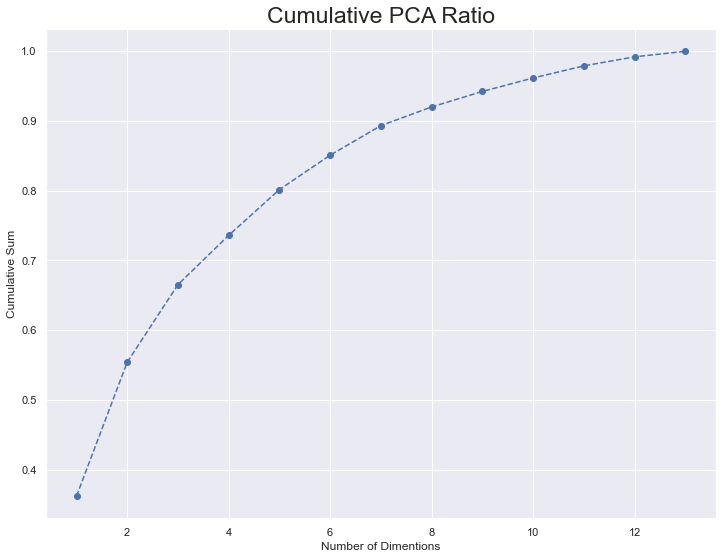

In [39]:
plt.figure(figsize=(12,9))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative PCA Ratio', fontsize=23)
plt.xlabel('Number of Dimentions')
plt.ylabel('Cumulative Sum')
plt.show()

#### 5 Dim Looks fine

In [40]:
pca = PCA(n_components=5)

In [41]:
pca.fit(df_std)

PCA(n_components=5)

In [42]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ]])

In [43]:
pca_df = pd.DataFrame(data=pca.components_,
                      columns = df.columns.values,
                      index = ['com1', 'com2', 'com3', 'com4', 'com5'])

<Axes: >

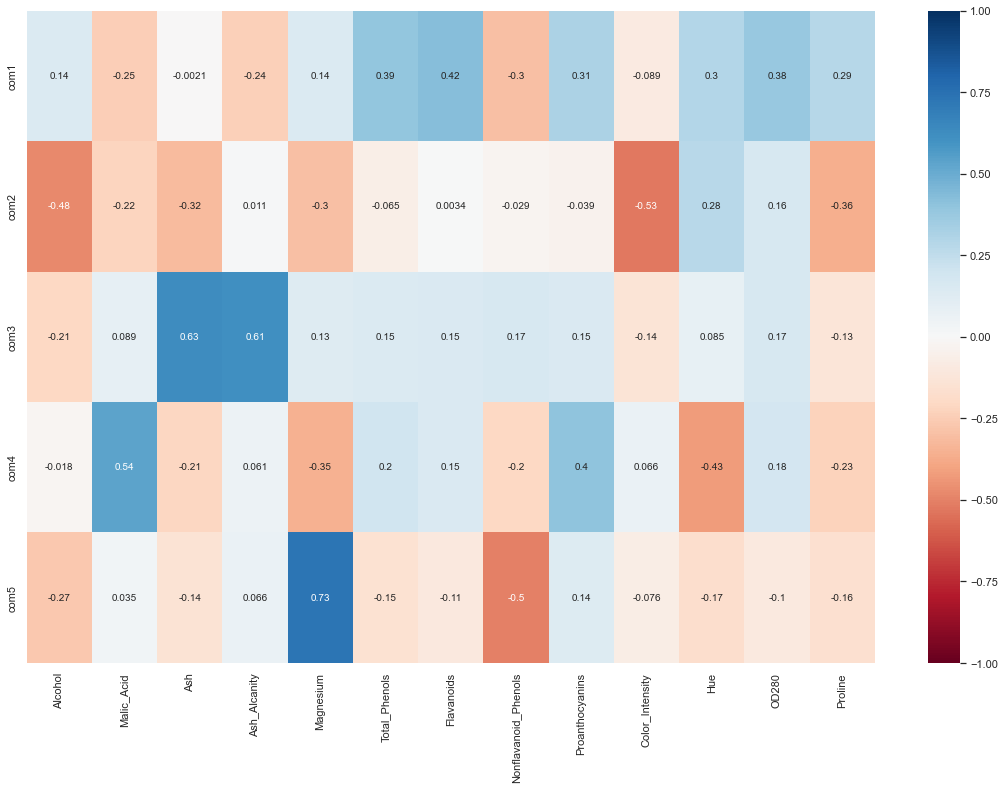

In [46]:
plt.figure(figsize=(19,12))
sns.heatmap(pca_df,
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap='RdBu')

In [47]:
scores_pca = pca.transform(df_std)

In [48]:
wcss_pca = []

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters= i, init='k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca)
    wcss_pca.append(kmeans_pca.inertia_)

/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amirosein/opt/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.

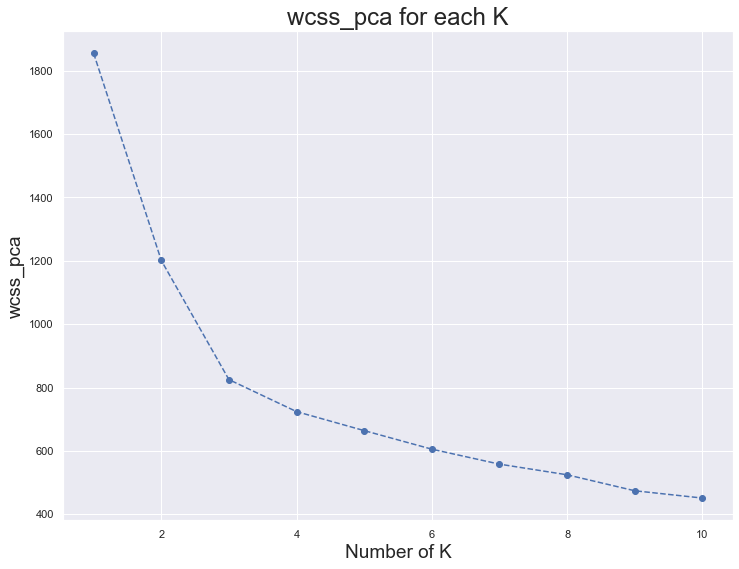

In [49]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss_pca, marker='o', linestyle='--')
plt.title('wcss_pca for each K', fontsize = 24)
plt.xlabel('Number of K', fontsize=19)
plt.ylabel('wcss_pca', fontsize=19, rotation=90)
plt.show()

In [50]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [51]:
df_merge = pd.concat([df_clus.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)

In [52]:
df_merge.columns.values[-5:] = ['com1', 'com2', 'com3', 'com4', 'com5']

In [53]:
df_merge['seg_kmeans_labels_pca'] = kmeans.labels_

In [54]:
df_merge.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,...,OD280,Proline,Group,Labels,com1,com2,com3,com4,com5,seg_kmeans_labels_pca
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,...,3.92,1065,2,GROUP C,3.316751,-1.443463,-0.165739,-0.215631,0.693043,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,...,3.40,1050,2,GROUP C,2.209465,0.333393,-2.026457,-0.291358,-0.257655,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,...,3.17,1185,2,GROUP C,2.516740,-1.031151,0.982819,0.724902,-0.251033,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,...,3.45,1480,2,GROUP C,3.757066,-2.756372,-0.176192,0.567983,-0.311842,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,...,2.93,735,2,GROUP C,1.008908,-0.869831,2.026688,-0.409766,0.298458,2


In [58]:
df_merge.corr()['Group']

/var/folders/hg/h4r5pwgd6q11lyngyfsf63fr0000gn/T/ipykernel_12676/1855215894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merge.corr()['Group']


Alcohol                  0.744923
Malic_Acid               0.045080
Ash                      0.364251
Ash_Alcanity            -0.325439
Magnesium                0.450840
Total_Phenols            0.397967
Flavanoids               0.394298
Nonflavanoid_Phenols    -0.217331
Proanthocyanins          0.214142
Color_Intensity          0.460544
Hue                     -0.004193
OD280                    0.204318
Proline                  0.790042
Group                    1.000000
com1                     0.440136
com2                    -0.728234
com3                    -0.066407
com4                    -0.094490
com5                    -0.093419
seg_kmeans_labels_pca    1.000000
Name: Group, dtype: float64

In [59]:
df_pca_freq = df_merge.groupby(['seg_kmeans_labels_pca']).mean()
df_pca_freq

/var/folders/hg/h4r5pwgd6q11lyngyfsf63fr0000gn/T/ipykernel_12676/3872917026.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pca_freq = df_merge.groupby(['seg_kmeans_labels_pca']).mean()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Group,com1,com2,com3,com4,com5
seg_kmeans_labels_pca,,,,,,,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,0.0,-0.036957,1.772239,0.186139,0.080240,0.070878
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,1.0,-2.720036,-1.125651,-0.239093,0.062457,0.073676
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.0,2.276194,-0.932054,0.001528,-0.135498,-0.134912


/var/folders/hg/h4r5pwgd6q11lyngyfsf63fr0000gn/T/ipykernel_12676/2596751556.py:6: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x='com2', y='com1', hue='seg_kmeans_labels_pca', data=df_merge, palette=['g', 'r', 'c', 'm'])


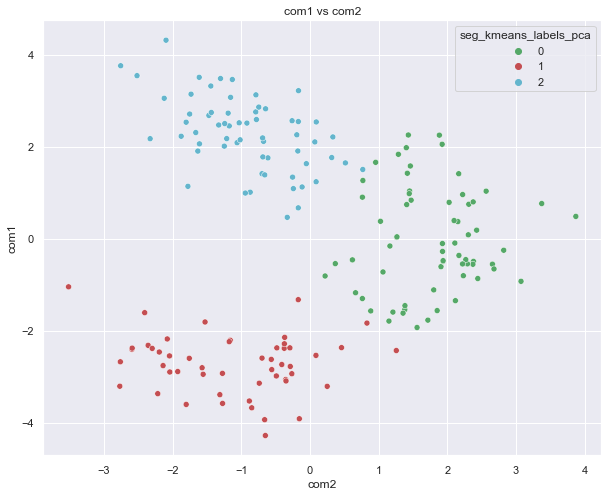

In [61]:
x_axis = df_merge['com1']
y_axis = df_merge['com2']
hue = df_merge['Labels']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='com2', y='com1', hue='seg_kmeans_labels_pca', data=df_merge, palette=['g', 'r', 'c', 'm'])
plt.title('com1 vs com2')
plt.show()